In [21]:
import os.path
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%autosave 0

Autosave disabled


In [77]:
resnet_graph = tf.Graph()
with resnet_graph.as_default():
    saver = tf.train.import_meta_graph('./checkpoints/checkpoint_780.chk.meta')

with tf.Session(graph=resnet_graph) as sess:
    saver.restore(sess, './checkpoints/checkpoint_780.chk')
#     filename = 'data/apple/apple_s_000022.png'
#     image = ndimage.imread(filename)
#     feed_dict = {inputs: [image]}
#     guess = sess.run(prediction, feed_dict=feed_dict)
#     if guess[0] == 1:
#         print('Guess: hamster')
#     else:
#         print('Guess: hare')
#     plt.imshow(image)
#     plt.show()


In [80]:
with resnet_graph.as_default():
    #for i in tf.trainable_variables():
    for i in tf.global_variables():
        print(i.name)

global_step:0
init/init_conv/DW:0
unit_1_0/shared_activation/init_bn/beta:0
unit_1_0/shared_activation/init_bn/gamma:0
unit_1_0/shared_activation/init_bn/moving_mean:0
unit_1_0/shared_activation/init_bn/moving_variance:0
unit_1_0/shared_activation/init_bn/unit_1_0/shared_activation/init_bn/moving_mean/biased:0
unit_1_0/shared_activation/init_bn/unit_1_0/shared_activation/init_bn/moving_mean/local_step:0
unit_1_0/shared_activation/init_bn/unit_1_0/shared_activation/init_bn/moving_variance/biased:0
unit_1_0/shared_activation/init_bn/unit_1_0/shared_activation/init_bn/moving_variance/local_step:0
unit_1_0/sub1/conv1/DW:0
unit_1_0/sub2/bn2/beta:0
unit_1_0/sub2/bn2/gamma:0
unit_1_0/sub2/bn2/moving_mean:0
unit_1_0/sub2/bn2/moving_variance:0
unit_1_0/sub2/bn2/unit_1_0/sub2/bn2/moving_mean/biased:0
unit_1_0/sub2/bn2/unit_1_0/sub2/bn2/moving_mean/local_step:0
unit_1_0/sub2/bn2/unit_1_0/sub2/bn2/moving_variance/biased:0
unit_1_0/sub2/bn2/unit_1_0/sub2/bn2/moving_variance/local_step:0
unit_1_0/su

In [20]:
inputs= resnet_graph.get_tensor_by_name('init/init_conv/DW:0')
prediction= resnet_graph.get_tensor_by_name('logit/DW:0')

In [71]:
inputs.shape

TensorShape([Dimension(3), Dimension(3), Dimension(3), Dimension(16)])

In [28]:
import sys
def unpickle(file):
    fp = open(file, 'rb')
    if sys.version_info.major == 2:
        data = pickle.load(fp)
    elif sys.version_info.major == 3:
        data = pickle.load(fp, encoding='latin-1')
    fp.close()
    return data

In [29]:
picpath = './data/cifar100/cifar-100-python/test'
testdata = unpickle(picpath)

In [31]:
testdata.keys()

dict_keys(['batch_label', 'data', 'filenames', 'fine_labels', 'coarse_labels'])

In [50]:
test_pics = testdata['data']

In [52]:
test_pics.shape

(10000, 3072)

In [58]:
testimg.shape

(3072,)

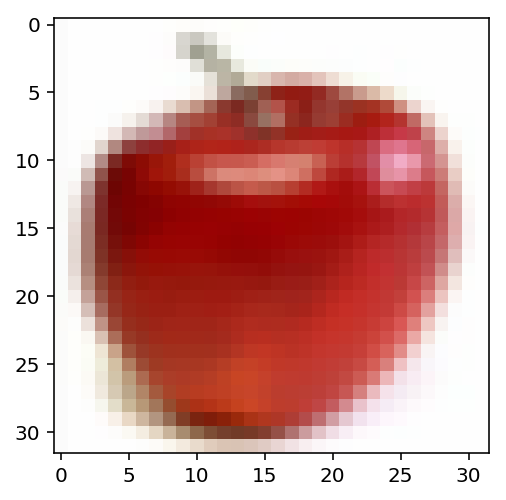

In [64]:
flam = plt.imread('flamingo.jpeg')
ap1 = plt.imread('data/apple/apple_s_000022.png')
plt.imshow(flam)
plt.imshow(ap1)

In [62]:
flam.shape

(253, 200, 3)

In [63]:
testimg = testimg.reshape([32,32,3])
plt.imshow(testimg)
plt.show()

TypeError: Object does not appear to be a 8-bit string path or a Python file-like object

In [46]:
from scipy import ndimage
import numpy as np
testimg = np.array(testdata['data'][200])
testimg = testdata['data'][200]
ndimage.imread(testimg)

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [68]:
# Spot check!
#filename = random.choice(valid_data)
filename = 'data/apple/apple_s_000022.png'
image = ndimage.imread(filename)
feed_dict = {inputs: [image]}
guess = sess.run(prediction, feed_dict=feed_dict)
if guess[0] == 1:
    print('Guess: hamster')
else:
    print('Guess: hare')
plt.imshow(image)
plt.show()

RuntimeError: Attempted to use a closed Session.